In [1]:
import parse
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import datasets, linear_model
# Display plots inline and change default figure size
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
var_names, data, labels = parse.start() # get the data

In [4]:
data, labels = np.array(data), np.array(labels)

In [5]:
reg = linear_model.LinearRegression()
train_data = data[:int(data.shape[0]*0.8),:]
train_labels = labels[:int(labels.shape[0]*.8)]
test_data = data[int(data.shape[0]*.8):,:]
test_labels = labels[int(data.shape[0]*.8):]
print train_data.shape
print train_labels.shape
print test_data.shape
print test_labels.shape


(1168, 80)
(1168,)
(292, 80)
(292,)


In [6]:
reg.fit(train_data, train_labels)
coefficients = reg.coef_
print coefficients

[ -2.68022748e-01  -1.01857486e+02  -1.53852221e+03   2.80712277e+00
   5.68123008e-01   3.30982968e+04  -2.85890522e+03  -3.78038255e+02
   4.31618561e+02  -2.61246755e+04  -7.98259051e+02   1.15541496e+04
  -1.91408717e+02   2.34458744e+03   1.64209442e+04  -2.54016471e+03
   1.05515477e+03   1.40814119e+04   6.13734355e+03   4.69289073e+02
   1.12663802e+02  -9.63475707e+02   1.48762224e+03   3.43140848e+02
   1.43224830e+02   1.55177094e+03   1.93327799e+01  -8.59352326e+02
   3.02274509e+02  -2.54144242e+03   2.31144653e+03  -1.58759426e+03
  -2.15967127e+03  -7.72125012e+02   1.88415822e+01  -7.07469679e+00
   4.98640538e+00  -2.36108264e+00   2.14669051e+01  -3.04369952e+03
  -8.32249218e+02   9.15778837e+03  -7.54798140e+02   1.33606227e+01
   2.21017033e+01   2.66214867e+00   3.81244748e+01   6.58507349e+02
  -1.77974010e+02   1.73895273e+03   2.31952878e+03  -9.62298213e+03
  -2.52971680e+04   8.70228607e+02   4.88293861e+03   1.33800434e+03
   8.09478747e+03  -1.91445963e+03

In [13]:
predictions = reg.predict(test_data)
for i in range(100,110):
    print "predicted price: " + str(predictions[i]) + ", actual price: " + str(test_labels[i])
squared_error = np.mean((predictions - test_labels)**2)
mse = squared_error
print "mean squared error: " + str(mse)
explained_variance = reg.score(test_data, test_labels)
print "explaiend variance: " + str(explained_variance)
e = sum(abs(predictions - test_labels))/float(len(test_labels))
print "the average prediction is off by " + str(e)

predicted price: 369813.28007, actual price: 381000
predicted price: 126114.536404, actual price: 144000
predicted price: 239882.131849, actual price: 260000
predicted price: 163208.432771, actual price: 185750
predicted price: 110789.628219, actual price: 137000
predicted price: 176813.693378, actual price: 177000
predicted price: 121991.792407, actual price: 139000
predicted price: 155116.664706, actual price: 137000
predicted price: 159620.729473, actual price: 162000
predicted price: 200536.332079, actual price: 197900
mean squared error: 2904092640.87
explaiend variance: 0.566900432335
the average prediction is off by 25717.4927145


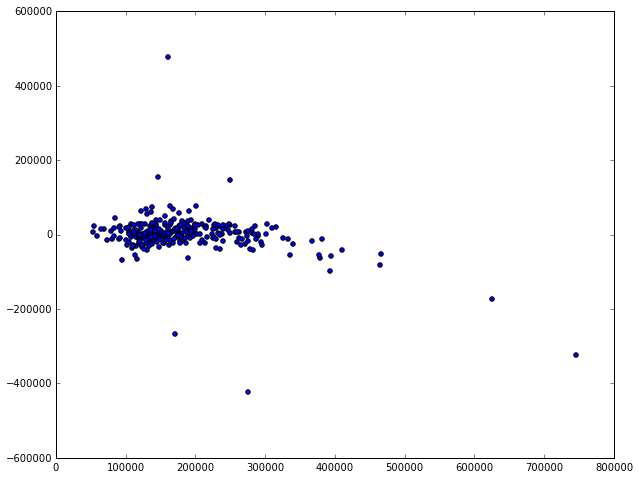

In [16]:
plt.scatter(test_labels, list(predictions-test_labels))

In [28]:
ridge = linear_model.RidgeCV(alphas = [.5, .1, 1.0])
ridge.fit(train_data, train_labels)
print ridge.alpha_

1.0


In [29]:
predictions = ridge.predict(test_data)
for i in range(100,110):
    print "predicted price: " + str(predictions[i]) + ", actual price: " + str(test_labels[i])
squared_error = np.mean((predictions - test_labels)**2)
mse = squared_error
print "mean squared error: " + str(mse)
explained_variance = reg.score(test_data, test_labels)
print "explaiend variance: " + str(explained_variance)
e = sum(abs(predictions - test_labels))/float(len(test_labels))
print "the average prediction is off by " + str(e)

predicted price: 369291.253187, actual price: 381000
predicted price: 126966.585814, actual price: 144000
predicted price: 240232.559704, actual price: 260000
predicted price: 163268.214559, actual price: 185750
predicted price: 111270.29868, actual price: 137000
predicted price: 176843.45736, actual price: 177000
predicted price: 121643.038624, actual price: 139000
predicted price: 155290.401436, actual price: 137000
predicted price: 159356.726267, actual price: 162000
predicted price: 201175.778431, actual price: 197900
mean squared error: 2486431710.49
explaiend variance: 0.566900432335
the average prediction is off by 23878.1369609


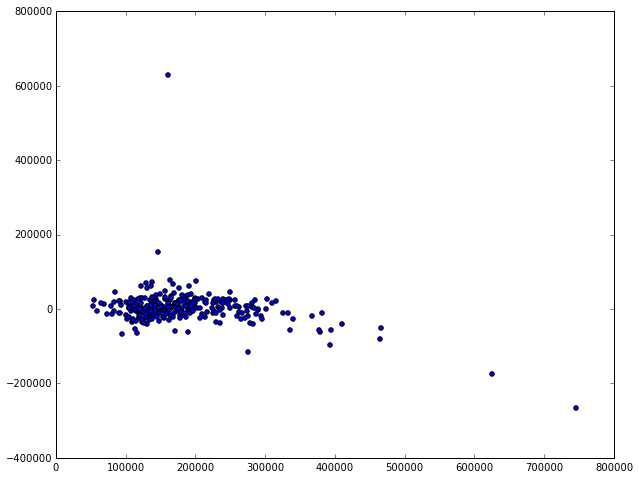

In [30]:
plt.scatter(test_labels, list(predictions-test_labels))

In [32]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(train_data, train_labels)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
predictions = lasso.predict(test_data)
for i in range(100,110):
    print "predicted price: " + str(predictions[i]) + ", actual price: " + str(test_labels[i])
squared_error = np.mean((predictions - test_labels)**2)
mse = squared_error
print "mean squared error: " + str(mse)
explained_variance = reg.score(test_data, test_labels)
print "explaiend variance: " + str(explained_variance)
e = sum(abs(predictions - test_labels))/float(len(test_labels))
print "the average prediction is off by " + str(e)

predicted price: 369808.360981, actual price: 381000
predicted price: 126125.905905, actual price: 144000
predicted price: 239884.11554, actual price: 260000
predicted price: 163210.948847, actual price: 185750
predicted price: 110794.593776, actual price: 137000
predicted price: 176815.788539, actual price: 177000
predicted price: 121985.799831, actual price: 139000
predicted price: 155115.627836, actual price: 137000
predicted price: 159617.74475, actual price: 162000
predicted price: 200545.092499, actual price: 197900
mean squared error: 2888414535.93
explaiend variance: 0.566900432335
the average prediction is off by 25688.911273


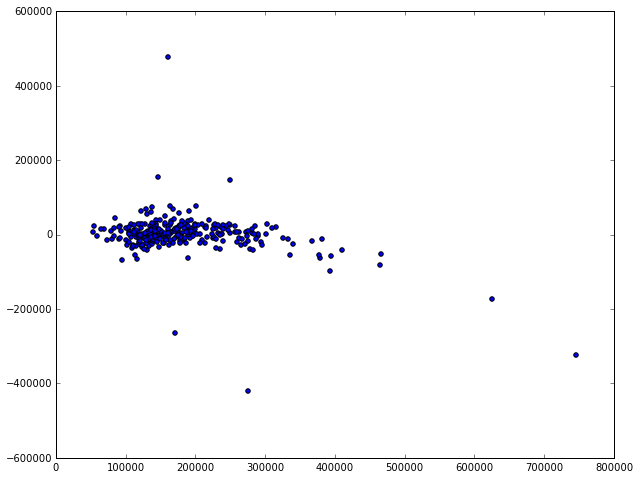

In [36]:
plt.scatter(test_labels,list((predictions-test_labels)))